In [1]:
import os, pickle, time

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from my_util import *
from evaluation_function import *
from lime.lime.lime_tabular import LimeTabularExplainer

from pyexplainer.pyexplainer_pyexplainer import *

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

#importing my model 
from mohit_base_algorithm.pyexplainer_pyexplainer import *

# test if the evaluation_fuction file's latest version has been synced or not
test_file_sync()

Version 6.3.13:26:48


### Global Model Evaluation

In [3]:
get_global_model_evaluation_result('openstack')

RF global model result
AUC: 0.7468482561455155, F1: 0.35515695067264574, IFA: 244, Recall@20%Effort: 0.5619195046439629, Popt: 0.8247763516141581
              precision    recall  f1-score   support

       False       0.87      0.92      0.89      3317
        True       0.42      0.31      0.36       646

    accuracy                           0.82      3963
   macro avg       0.65      0.61      0.62      3963
weighted avg       0.80      0.82      0.81      3963

----------------------------------------------------------------------------------------------------
LR global model result
AUC: 0.6664985052142495, F1: 0.3596035865974517, IFA: 35, Recall@20%Effort: 0.5402476780185759, Popt: 0.8257826171495235
              precision    recall  f1-score   support

       False       0.89      0.67      0.77      3317
        True       0.26      0.59      0.36       646

    accuracy                           0.66      3963
   macro avg       0.58      0.63      0.56      3963
weighted a

In [4]:
get_global_model_evaluation_result('qt')

RF global model result
AUC: 0.7350656132213174, F1: 0.20954907161803715, IFA: 19, Recall@20%Effort: 0.8340336134453782, Popt: 0.9434782608695651
              precision    recall  f1-score   support

       False       0.95      0.97      0.96      7801
        True       0.28      0.17      0.21       476

    accuracy                           0.93      8277
   macro avg       0.62      0.57      0.59      8277
weighted avg       0.91      0.93      0.92      8277

----------------------------------------------------------------------------------------------------
LR global model result
AUC: 0.6446095038451222, F1: 0.15877957658779576, IFA: 7, Recall@20%Effort: 0.8172268907563025, Popt: 0.9467080745341614
              precision    recall  f1-score   support

       False       0.96      0.68      0.80      7801
        True       0.09      0.54      0.16       476

    accuracy                           0.67      8277
   macro avg       0.53      0.61      0.48      8277
weighted av

## Comparing Synthetic Data Generated (RQ1, RQ2 & RQ3)

We compare three facets , 
- first is the distance (euclidean) of the data that has been generated. 
- second, how long does it take to generate the data samples 
- third, is my architecture genrating more unique samples or not ? 

### RQ1 : Similarity of Synthetic Data

In [2]:
rq1_preprocess('openstack', 'RF')

100%|██████████| 198/198 [00:03<00:00, 49.72it/s]

finished RQ1 Preprocess of openstack , globla model is RF


In [3]:
rq1_preprocess('qt', 'RF')
rq1_preprocess('openstack', 'LR')
rq1_preprocess('qt', 'LR')

100%|██████████| 79/79 [00:01<00:00, 48.74it/s]


finished RQ1 Preprocess of qt , globla model is RF


100%|██████████| 382/382 [00:07<00:00, 51.02it/s]


finished RQ1 Preprocess of openstack , globla model is LR


100%|██████████| 255/255 [00:05<00:00, 48.65it/s]

finished RQ1 Preprocess of qt , globla model is LR


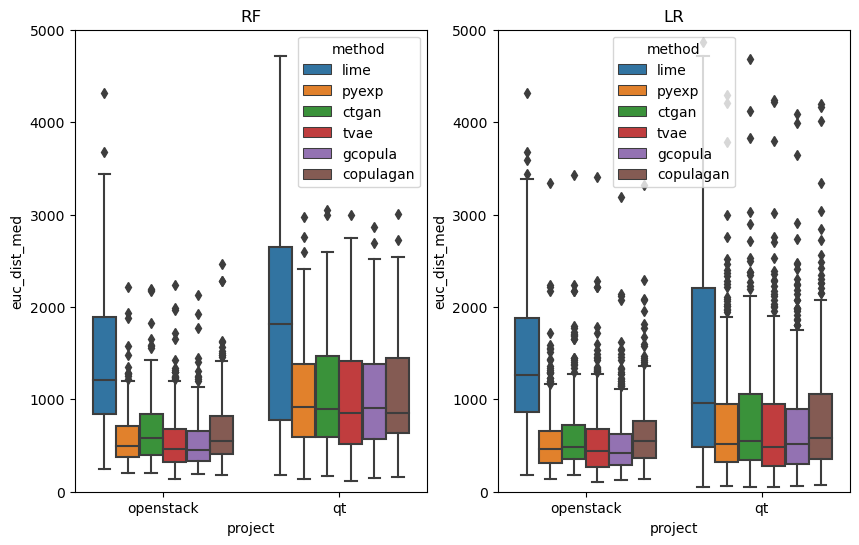

In [4]:
show_rq1_images()

In [4]:
show_rq1_scores()

          similarity lime_similarity_score                          \
                mean                   min        mean         max   
method                                                               
copulagan   0.001920            -82.883789  118.536139  829.232434   
ctgan       0.001916            -85.653408  116.567041  659.940101   
gcopula     0.002217            -78.473257  150.372972  766.586587   
lime        0.001217              0.000000    0.000000    0.000000   
pyexp       0.001962            -80.890406  124.139488  670.112640   
tvae        0.002322            -71.073955  154.937264  748.293567   

          pyexp_similarity_score                         
                             min       mean         max  
method                                                   
copulagan             -61.096944  -1.368875  109.971052  
ctgan                 -59.571776  -0.769273   96.763697  
gcopula               -41.980648  11.773965   51.840784  
lime                 

### RQ2 : Time Analysis for Data Generation

In [5]:
rq2_preprocess('openstack', 'RF')

100%|██████████| 198/198 [00:01<00:00, 105.37it/s]

finished RQ2 Preprocess of openstack , globla model is RF


In [6]:
rq2_preprocess('qt', 'RF')
rq2_preprocess('openstack', 'LR')
rq2_preprocess('qt', 'LR')

100%|██████████| 79/79 [00:00<00:00, 105.05it/s]


finished RQ2 Preprocess of qt , globla model is RF


100%|██████████| 382/382 [00:03<00:00, 109.77it/s]


finished RQ2 Preprocess of openstack , globla model is LR


100%|██████████| 255/255 [00:02<00:00, 109.72it/s]

finished RQ2 Preprocess of qt , globla model is LR


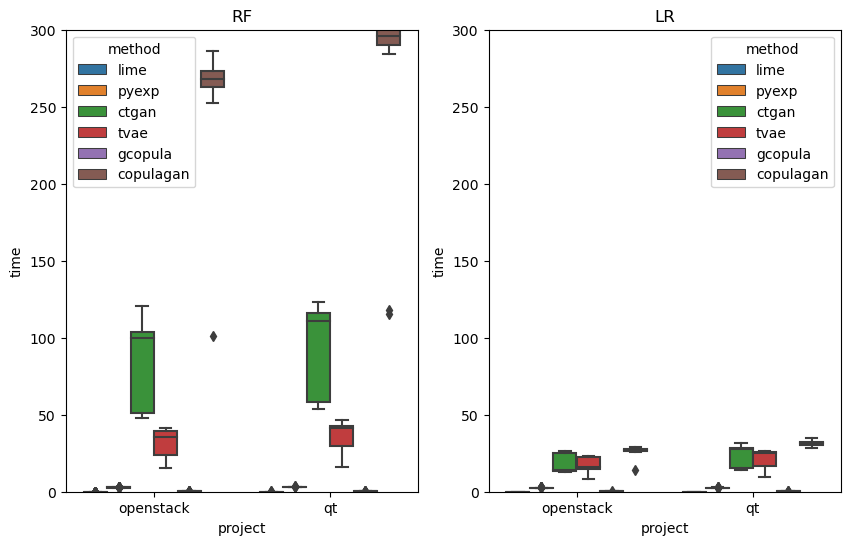

In [4]:
show_rq2_images()

In [7]:
show_rq2_scores()

                time            
                 min        mean
method                          
copulagan  14.152579  103.329893
ctgan      12.701472   39.209039
gcopula     0.254250    0.378309
lime        0.000000    0.038021
pyexp       2.617206    2.727570
tvae        8.444084   23.191470


### RQ3 : Uniqueness of Samples 

In [2]:
rq3_showsampledata('openstack', 'RF')

                                           la  nd  ns       ent  nrev  \
commit_id                                                               
1e6973aee7137653c62dcef970b1e2527b50517d  258   2   1  0.826278   2.0   
5d0ccceb20780fdd3adf519d3f8e6b80b1844407  190   7   1  0.839470  25.0   
de31210c05f464c4a79255de68b1a515d9b84ed3  121   2   1  0.758523   2.0   
957533f685caf9ffc0d9cad569598455d59ade34  121   5   1  0.863629   7.0   
96677735f6d8f1f5b6380127956921f719aab799  525   2   1  0.707022  29.0   

                                              rtime  self   ndev       age  \
commit_id                                                                    
1e6973aee7137653c62dcef970b1e2527b50517d  18.049560     0    1.0  5.242755   
5d0ccceb20780fdd3adf519d3f8e6b80b1844407  15.181620     0  164.0  0.833137   
de31210c05f464c4a79255de68b1a515d9b84ed3   0.357431     0   11.0  4.983553   
957533f685caf9ffc0d9cad569598455d59ade34  19.054421     0    4.0  7.935347   
96677735f6d8f1f5b638

## Explainers Evaluation (RQ4, RQ5, RQ6 and RQ7)

### RQ4 : Local Modal Accuracy

In [2]:
rq4_eval('openstack', 'RF')

100%|██████████| 198/198 [14:57<00:00,  4.53s/it]


finished RQ4 of openstack


In [3]:
rq4_eval('qt', 'RF')
rq4_eval('openstack', 'LR')
rq4_eval('qt', 'LR')

100%|██████████| 79/79 [06:08<00:00,  4.66s/it]


finished RQ4 of qt


100%|██████████| 382/382 [17:43<00:00,  2.78s/it]


finished RQ4 of openstack


100%|██████████| 255/255 [13:28<00:00,  3.17s/it]


finished RQ4 of qt


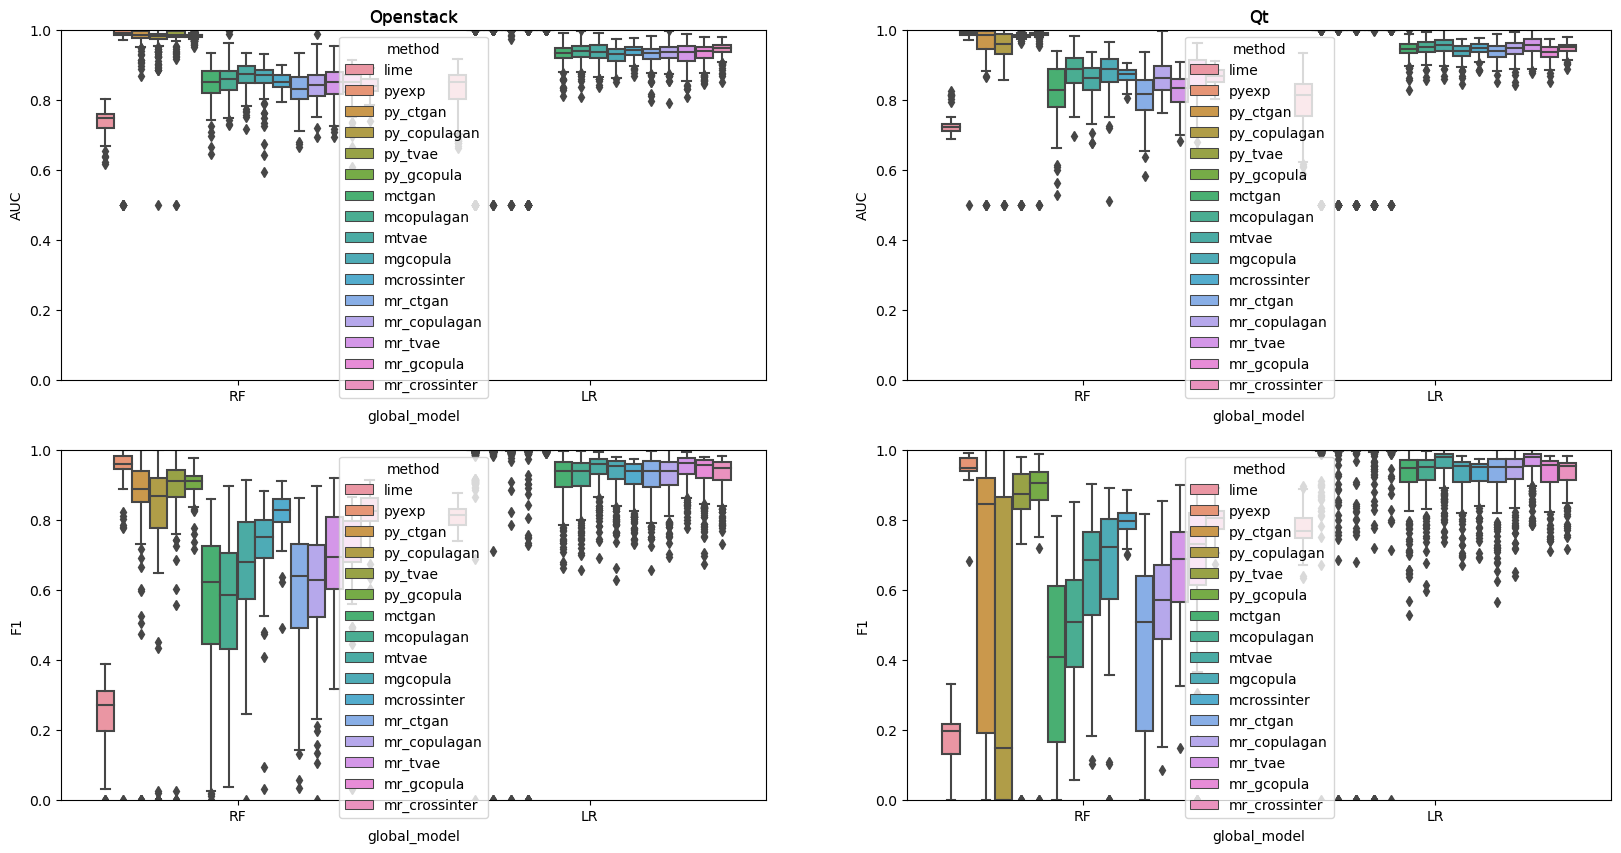

In [2]:
show_rq4_eval_result()

Generating Probs for Each Model
lime


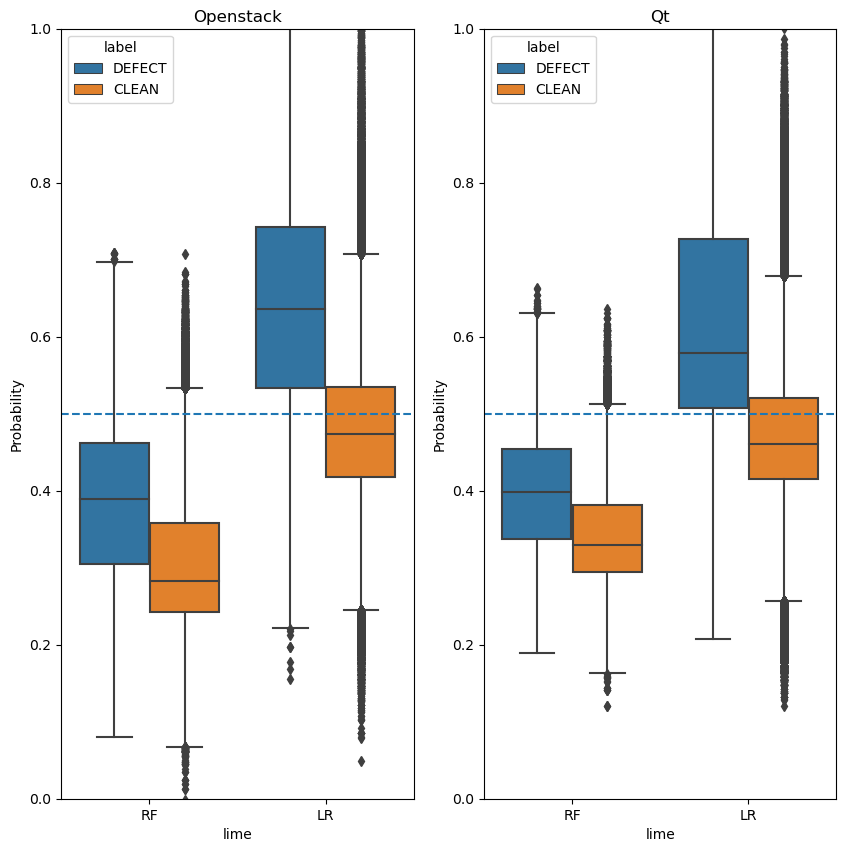

pyexp


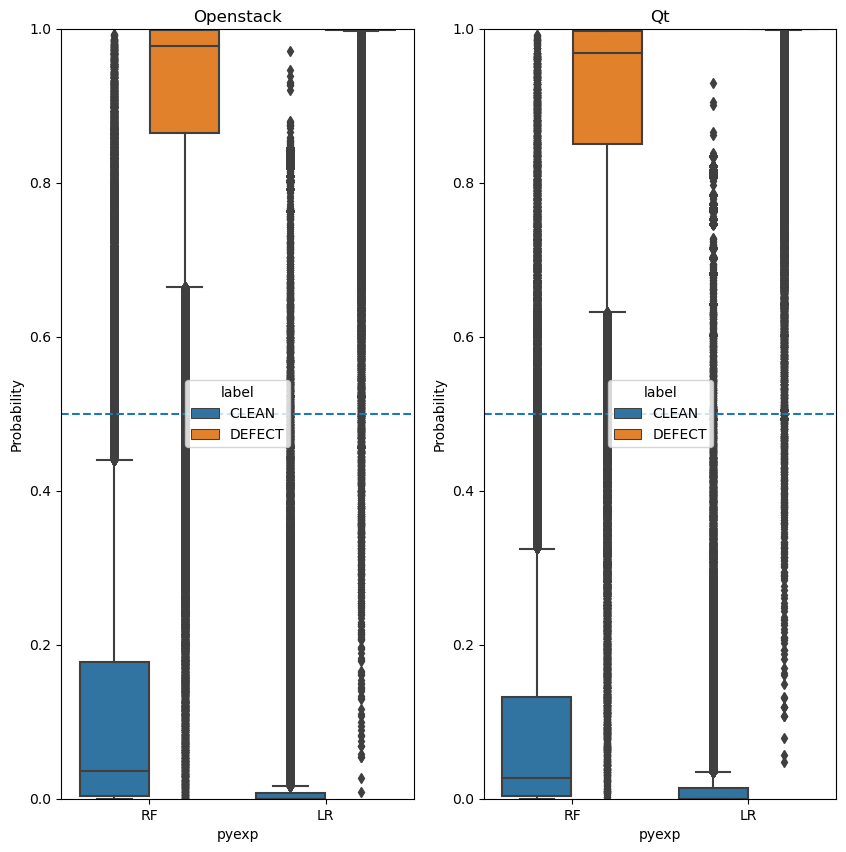

py_ctgan


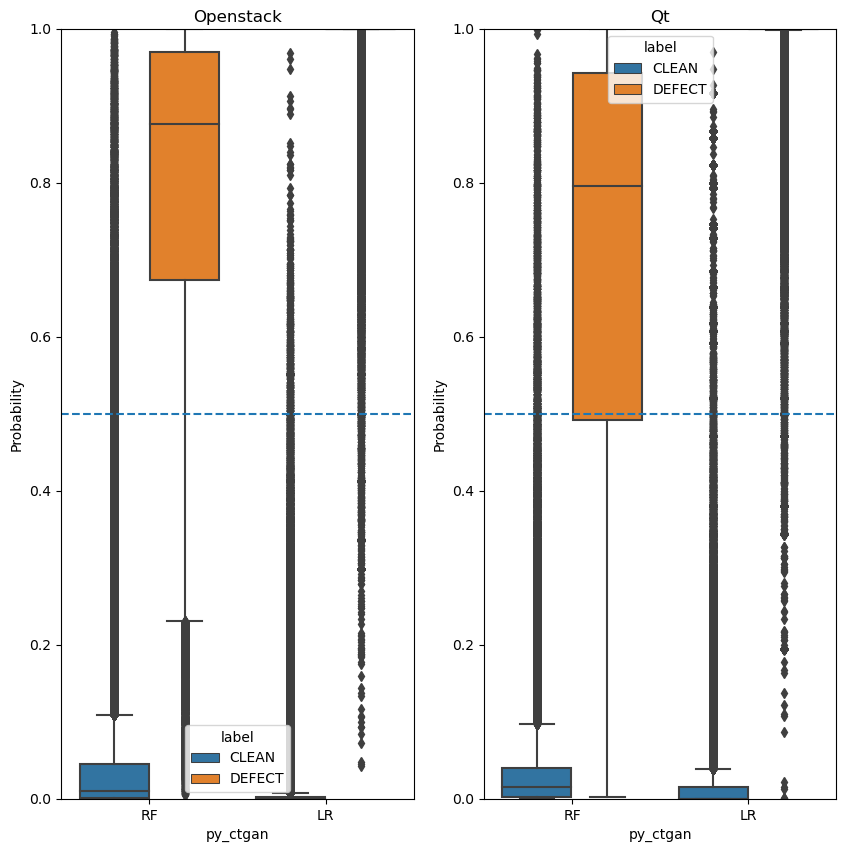

py_copulagan


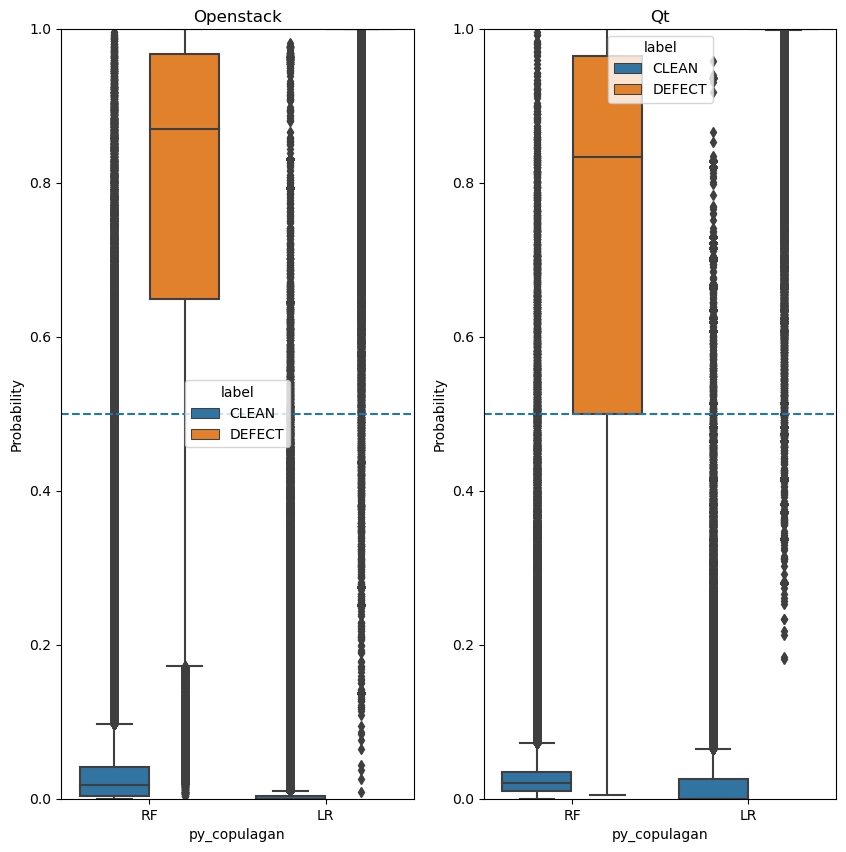

py_tvae


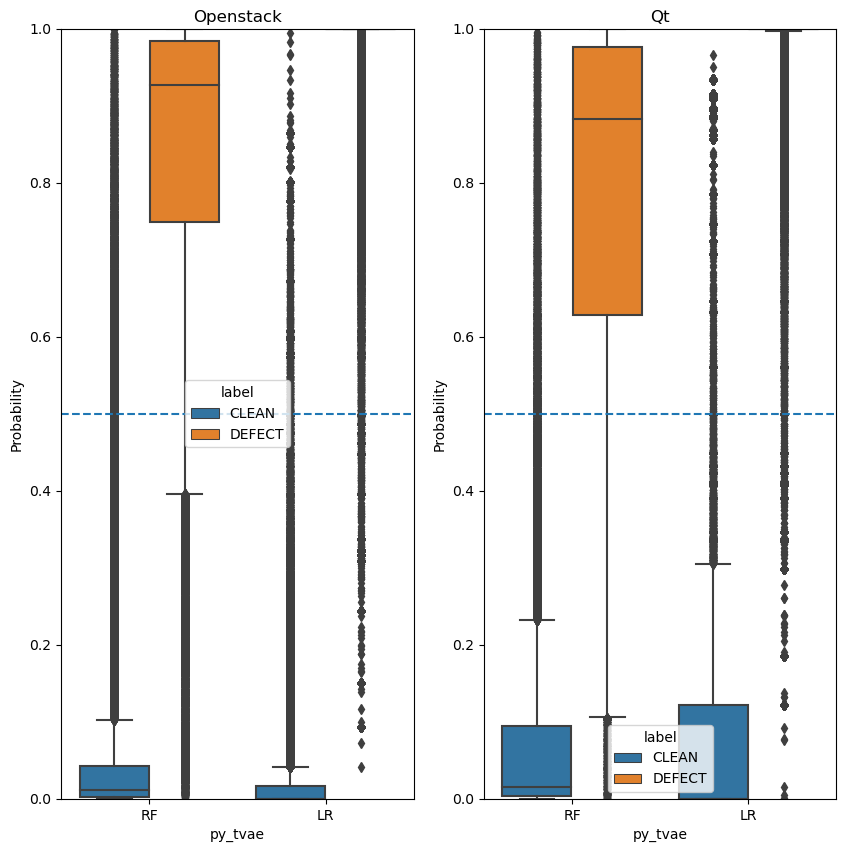

py_gcopula


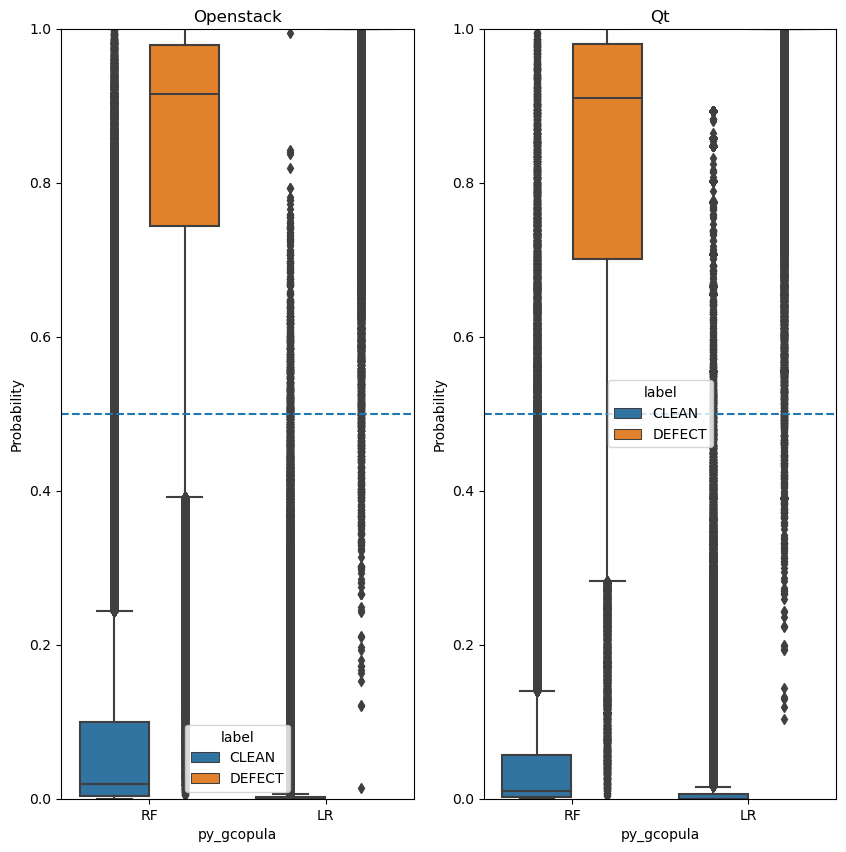

mctgan


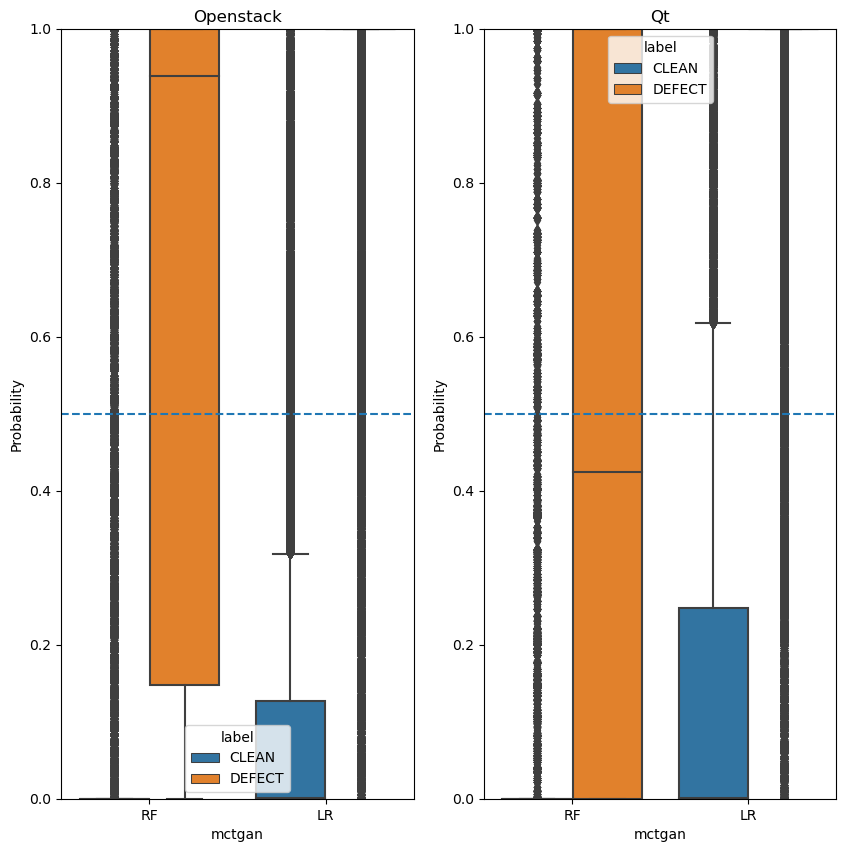

mcopulagan


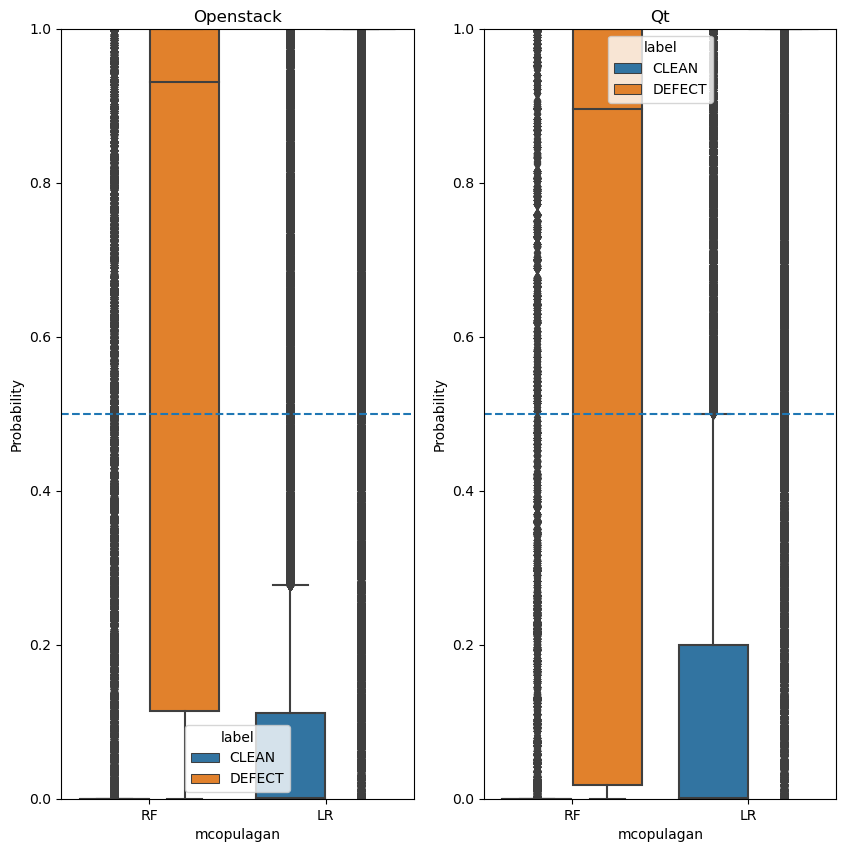

mtvae


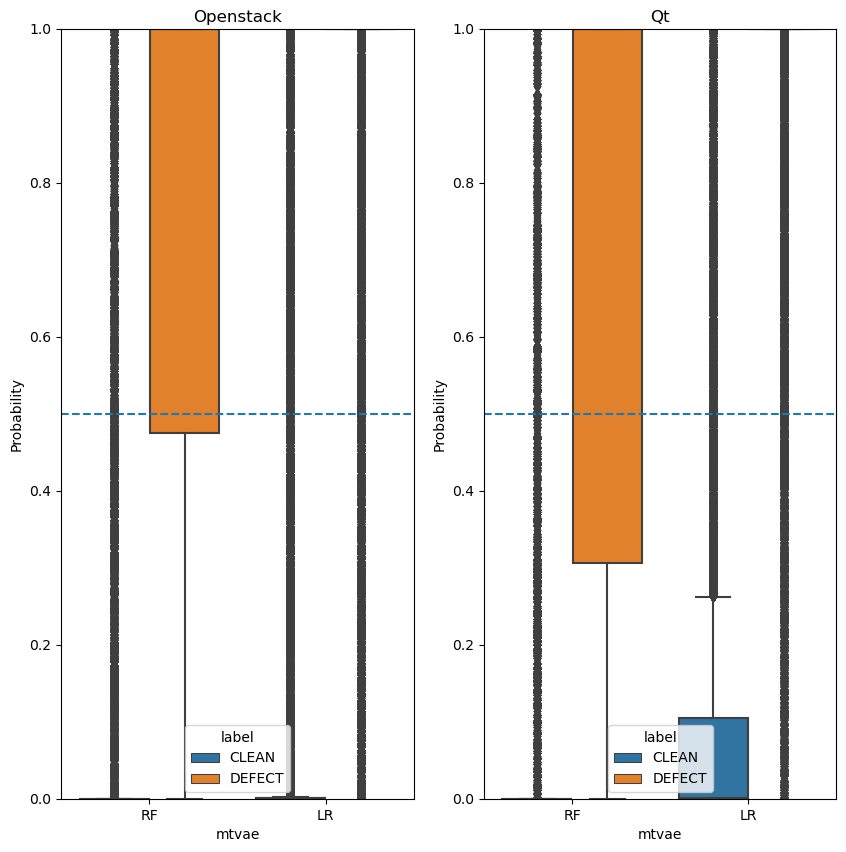

mgcopula


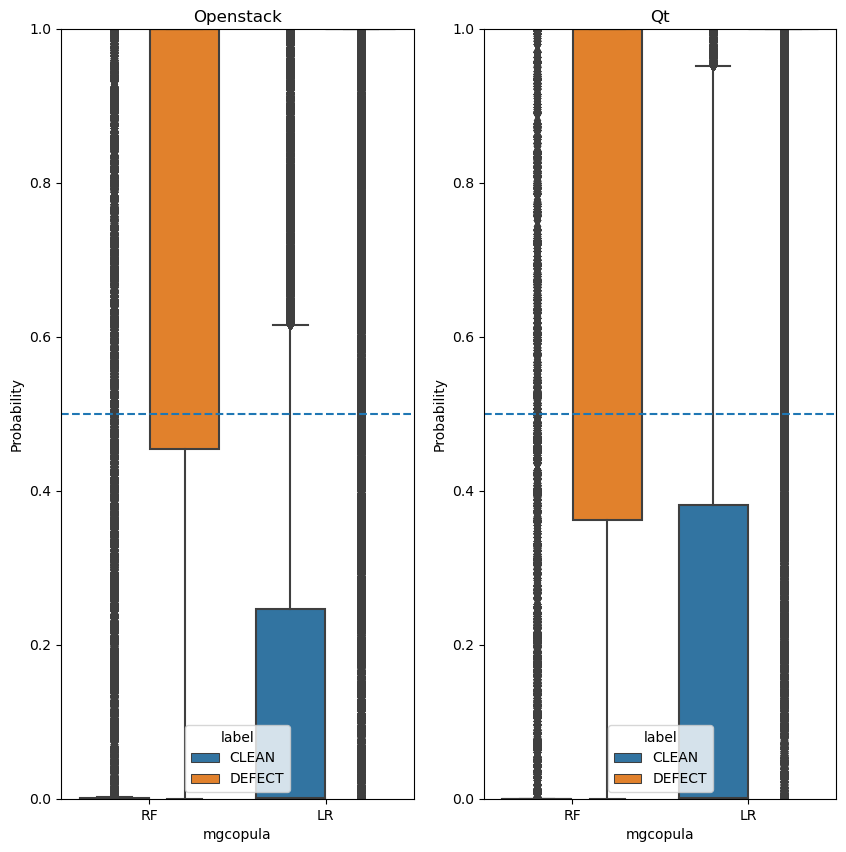

mcrossinter


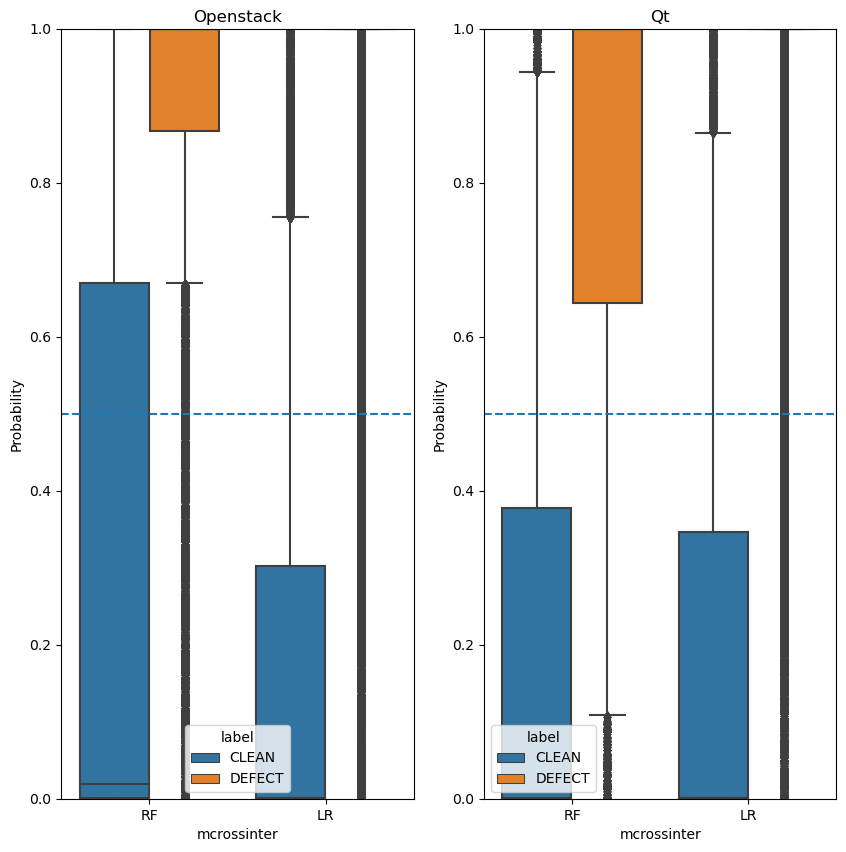

mr_ctgan


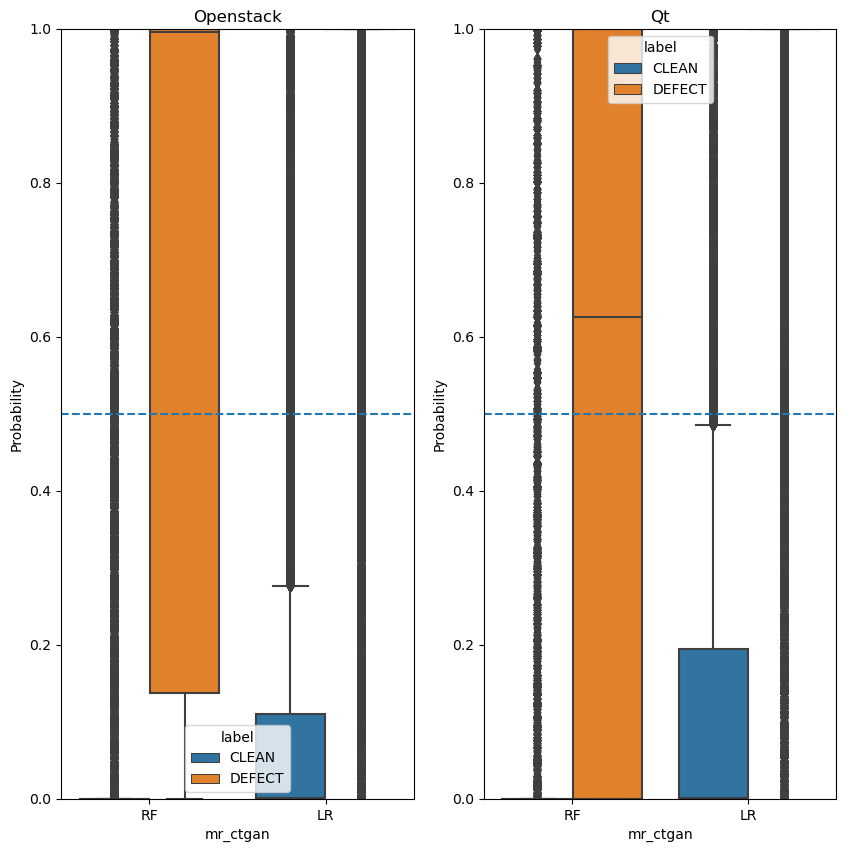

mr_copulagan


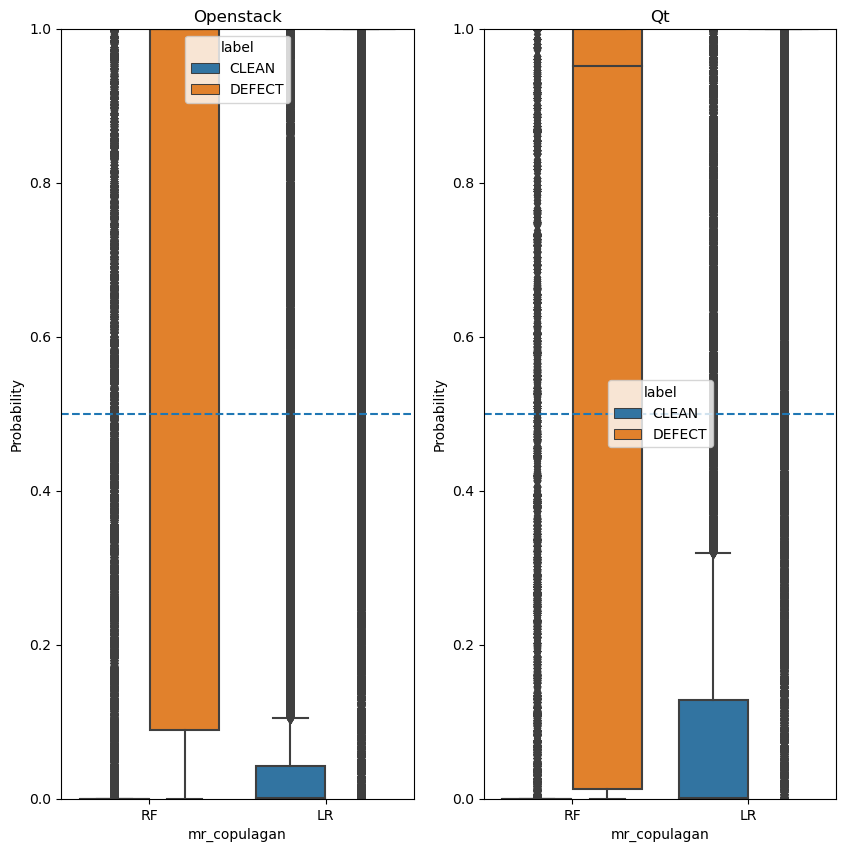

mr_tvae


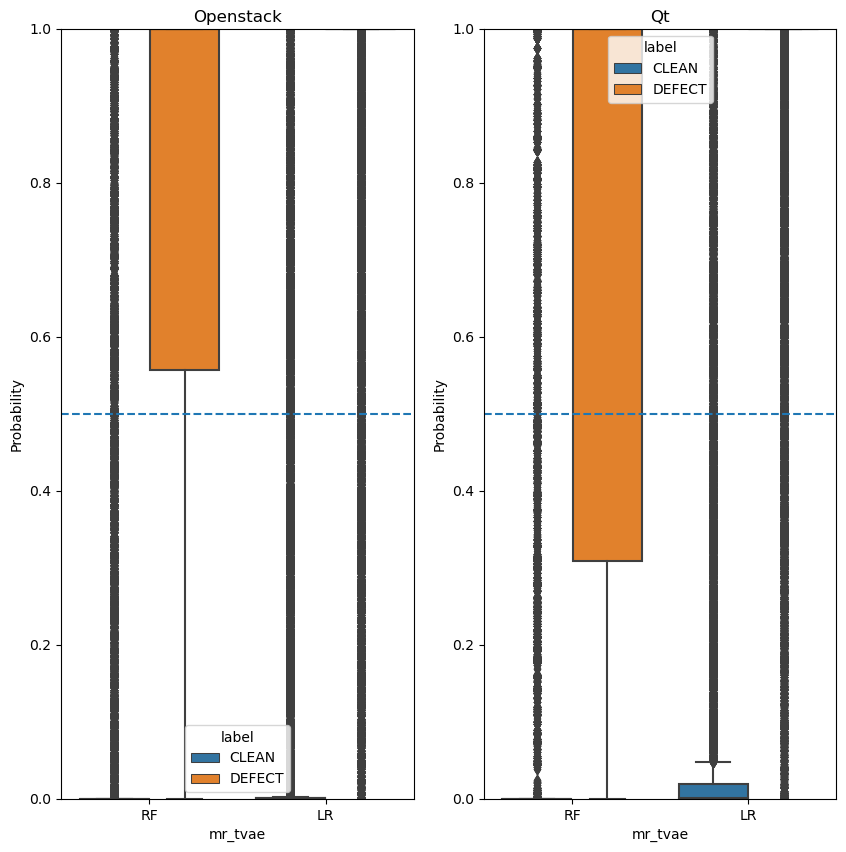

mr_gcopula


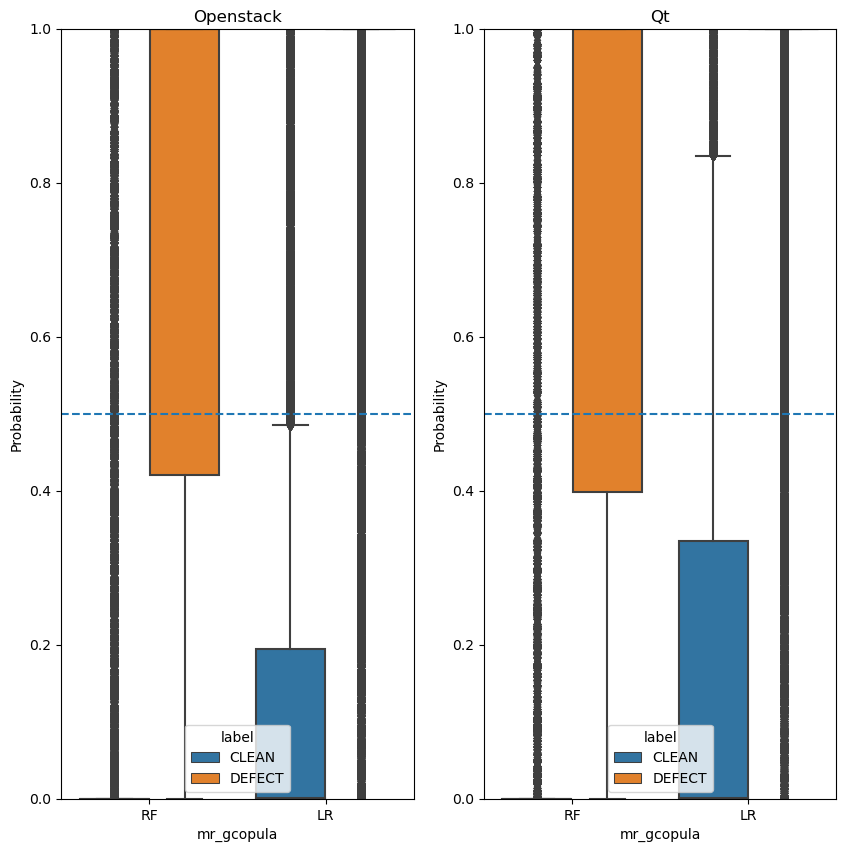

mr_crossinter


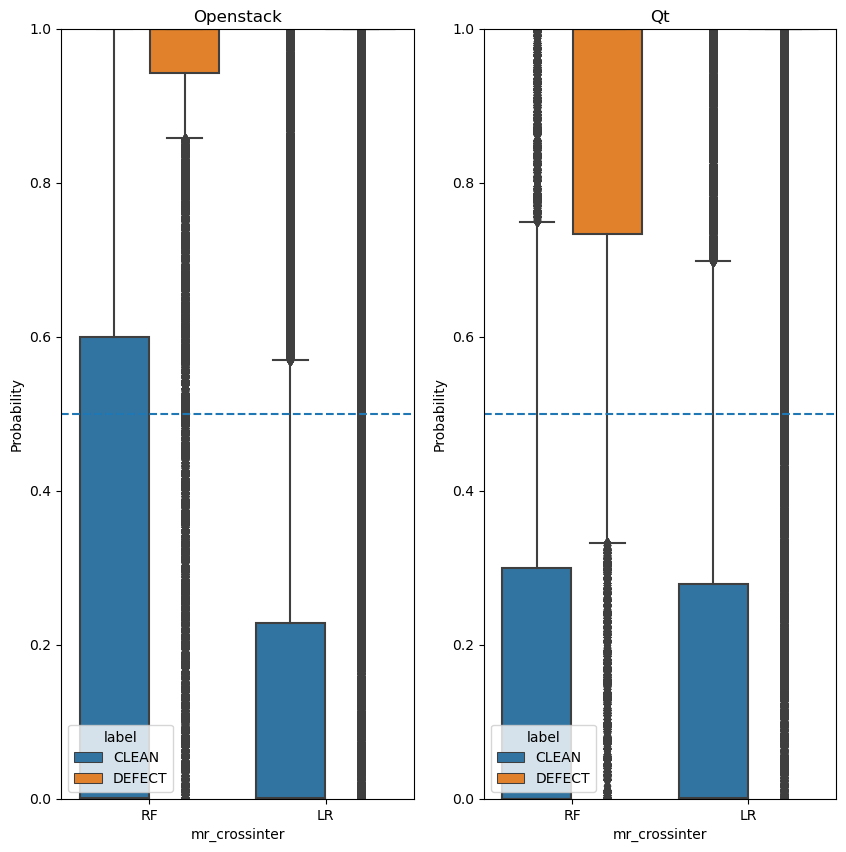

In [2]:
show_rq4_prob_distribution()

### RQ5 : Stability in Optimisation 

As per my calculations, for combination of 
- OpenStack & RF from 198 sample points, and 5 Pyexplainer Variants, we observed 165 failures of model convergence, none for any variant of Nodeharvest. 
- QT & LR, from 104 sample points, and 5 Pyepxlainer variants, we observed 118 failures of model convergence, none for any variant of Nodeharvest. 

Total Percentage Being 
- OpenStack & Rf : Pyexplainer fails -> (165/5)/198 *100 = 16.67 % failure rate. 
- QT & LR : Pyexplainer fails -> (118/5)/104 *100 = 22.69 % failure rate. 

### RQ6 : Speed of Models

In [2]:
rq6_preprocess('openstack', 'RF')

100%|██████████| 198/198 [01:10<00:00,  2.79it/s]

finished RQ6 of openstack


In [3]:
rq6_preprocess('qt', 'RF')
rq6_preprocess('openstack', 'LR')
rq6_preprocess('qt', 'LR')

100%|██████████| 79/79 [00:27<00:00,  2.83it/s]


finished RQ6 of qt


100%|██████████| 382/382 [02:10<00:00,  2.93it/s]


finished RQ6 of openstack


100%|██████████| 255/255 [01:32<00:00,  2.75it/s]

finished RQ6 of qt


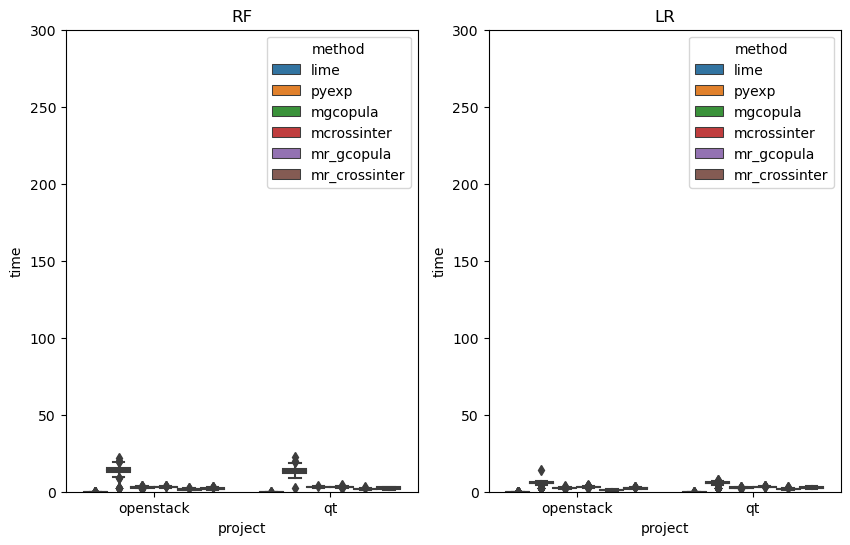

In [4]:
show_rq6_images()

In [5]:
show_rq6_scores()

mgcopula is faster than pyexp by  3.055093266292158  factors.
mr_gcopula is faster than pyexp by  5.506659179346901  factors.
mgcopula is faster than lime by  0.021797512953866553  factors.
mr_gcopula is faster than lime by  0.03928897232653703  factors.

                   time          
                    min      mean
method                           
lime           0.014128  0.057875
mcrossinter    2.356984  3.143370
mgcopula       1.828383  2.655126
mr_crossinter  1.254689  2.220936
mr_gcopula     0.725077  1.473063
pyexp          2.168876  8.111657


### RQ7 : Consisteny of Explanations

In [2]:
rq7_eval('openstack','RF',debug=False)

100%|██████████| 198/198 [26:53<00:00,  8.15s/it]


In [3]:
rq7_eval('qt','RF')
rq7_eval('openstack','LR')
rq7_eval('qt','LR')

100%|██████████| 255/255 [48:48<00:00, 11.48s/it]


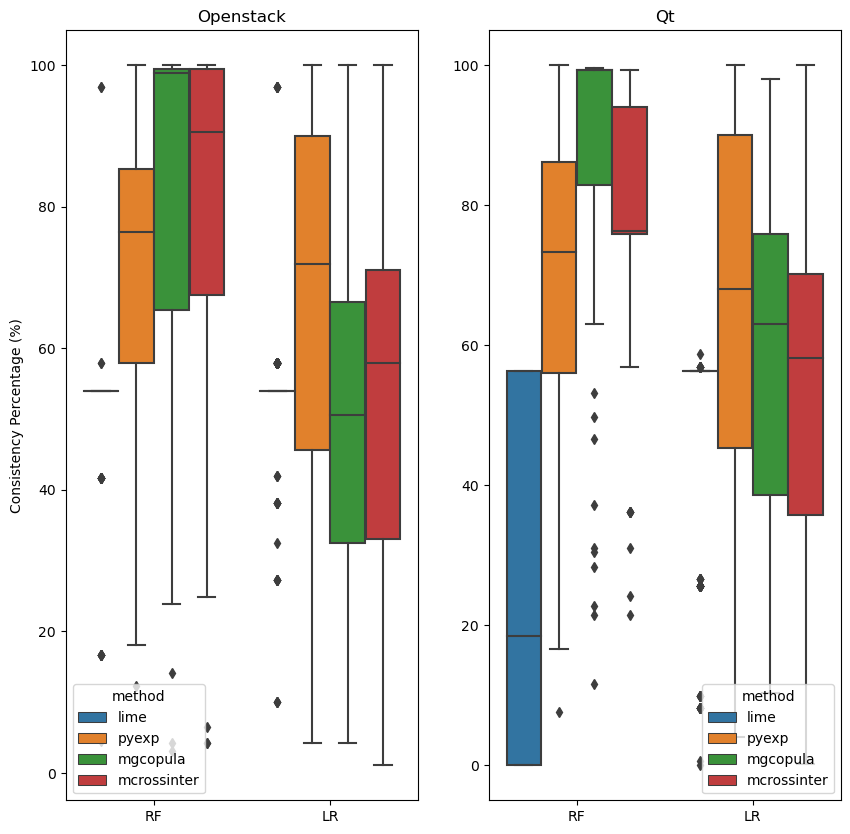

project: OpenStack, JIT model: RF, Agnostic: LIME
% unique explanation is 3.03
% duplicate explanation is 86
--------------------------------------------------
project: OpenStack, JIT model: RF, Agnostic: pyExplainer
% unique explanation is 88.89
% duplicate explanation is 4
--------------------------------------------------
project: OpenStack, JIT model: RF, Agnostic: TwiceLearn
% unique explanation is 31.82
% duplicate explanation is 45
--------------------------------------------------
project: OpenStack, JIT model: LR, Agnostic: LIME
% unique explanation is 2.09
% duplicate explanation is 71
--------------------------------------------------
project: OpenStack, JIT model: LR, Agnostic: pyExplainer
% unique explanation is 98.95
% duplicate explanation is 1
--------------------------------------------------
project: OpenStack, JIT model: LR, Agnostic: TwiceLearn
% unique explanation is 46.07
% duplicate explanation is 9
--------------------------------------------------
project: qt, 

In [4]:
show_rq7_eval_result()

OLDER RESULTS
project: OpenStack, JIT model: RF, Agnostic: LIME
% unique explanation is 3.54
% duplicate explanation is 86

project: OpenStack, JIT model: RF, Agnostic: pyExplainer
% unique explanation is 79.07
% duplicate explanation is 4

project: OpenStack, JIT model: RF, Agnostic: NodeHarvest
% unique explanation is 51.07
% duplicate explanation is 10

project: OpenStack, JIT model: LR, Agnostic: LIME
% unique explanation is 1.84
% duplicate explanation is 71

project: OpenStack, JIT model: LR, Agnostic: pyExplainer
% unique explanation is 97.53
% duplicate explanation is 0

project: OpenStack, JIT model: LR, Agnostic: NodeHarvest
% unique explanation is 93.17
% duplicate explanation is 1

project: qt, JIT model: RF, Agnostic: LIME
% unique explanation is 29.11
% duplicate explanation is 48

project: qt, JIT model: RF, Agnostic: pyExplainer
% unique explanation is 82.49
% duplicate explanation is 4

project: qt, JIT model: RF, Agnostic: NodeHarvest
% unique explanation is 62.95
% duplicate explanation is 6

project: qt, JIT model: LR, Agnostic: LIME
% unique explanation is 2.75
% duplicate explanation is 74

project: qt, JIT model: LR, Agnostic: pyExplainer
% unique explanation is 98.69
% duplicate explanation is 0

project: qt, JIT model: LR, Agnostic: NodeHarvest
% unique explanation is 94.86
% duplicate explanation is 1


## Further Analysis

In [ ]:
rq3_preprocess('openstack', 'RF')

In [ ]:
rq3_preprocess('qt', 'RF')
rq3_preprocess('openstack', 'LR')
rq3_preprocess('qt', 'LR')

In [ ]:
show_rq3_images()

In [ ]:
show_rq3_scores()

In [ ]:
rq3_preprocess('openstack', 'RF')

In [ ]:
rq3_preprocess('qt', 'RF')
rq3_preprocess('openstack', 'LR')
rq3_preprocess('qt', 'LR')

In [ ]:
show_rq3_images()

In [ ]:
show_rq3_scores()

In [ ]:
rq3_preprocess('openstack', 'RF')

In [ ]:
rq3_preprocess('qt', 'RF')
rq3_preprocess('openstack', 'LR')
rq3_preprocess('qt', 'LR')

In [ ]:
show_rq3_images()

In [ ]:
show_rq3_scores()

#### Local model accuracy

# What-if analysis

In [15]:
what_if_analysis('openstack','RF',debug=False)

# takes 20m


100%|██████████| 198/198 [02:42<00:00,  1.22it/s]

finished what-if of openstack


In [16]:
what_if_analysis('openstack','LR')
what_if_analysis('qt','RF')
what_if_analysis('qt','LR')

#takes 1h20m

100%|██████████| 381/381 [04:30<00:00,  1.41it/s]


finished what-if of openstack


100%|██████████| 79/79 [01:01<00:00,  1.29it/s]


finished what-if of qt


100%|██████████| 255/255 [03:04<00:00,  1.38it/s]

finished what-if of qt


<Figure size 640x480 with 0 Axes>

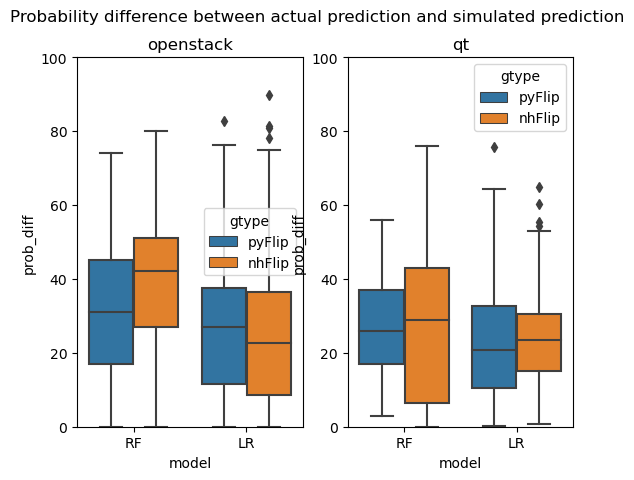

<Figure size 640x480 with 0 Axes>

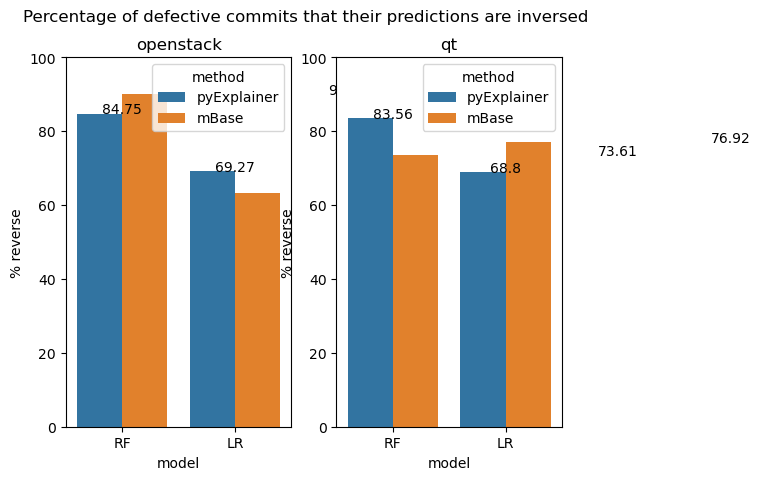

In [17]:
show_what_if_eval_result()

# Thanks